In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow import math

import pickle

In [11]:
wvs = pd.read_csv('../data/wvs_preprocessed.csv')

In [7]:
with open('../pickles/y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [8]:
with open('../pickles/Z_test.pickle', 'rb') as f:
    Z_test = pickle.load(f)

# Productions Models and Conclusions

## Production Model - Random Forest

In [4]:
with open('../models/rf.pickle', 'rb') as f:
    rf = pickle.load(f)

Just a reminder of how the model performed:

In [20]:
print('Test accuracy: ', rf.score(Z_test, y_test))

Test accuracy:  0.7140869565217391


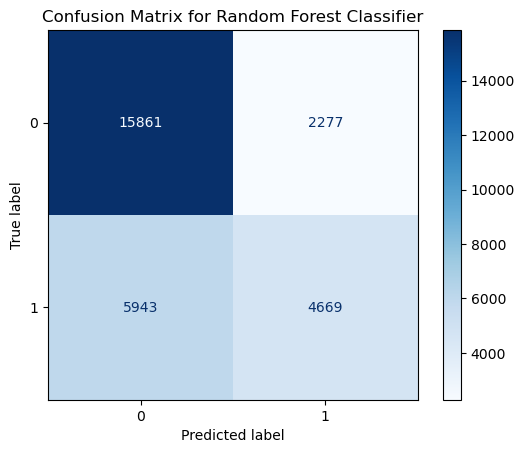

In [9]:
metrics.ConfusionMatrixDisplay.from_estimator(rf, Z_test, y_test, cmap = 'Blues')

plt.title('Confusion Matrix for Random Forest Classifier');

And now the thing I was most interested in seeing from this model: Feature Importances

In [13]:
importances = pd.DataFrame({'feature_names': wvs_preprocessed.drop(columns = ['authoritarianism_index', 'COUNTRY_ALPHA', 'aut_categories']).columns,
              'feature_importance': rf.feature_importances_})
importances.sort_values(by = 'feature_importance', ascending = False, inplace = True)
importances

,feature_names,feature_importance
41,S020,0.052281
8,A170,0.041690
14,F121,0.037537
39,F028,0.035727
9,F063,0.034869
13,F120,0.031207
12,F118,0.028921
40,X045,0.028909
23,D059,0.026469
18,A004,0.026321


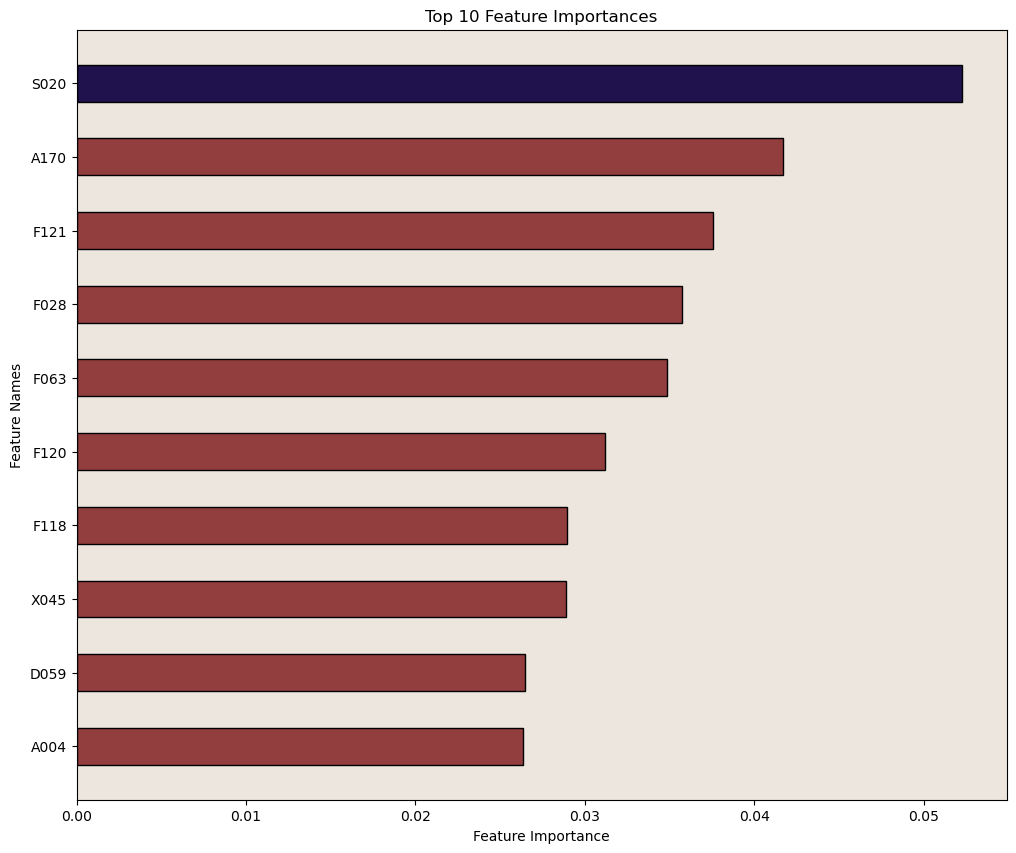

In [14]:
plt.figure(figsize=(12, 10))

imp = importances.head(10).sort_values(by='feature_importance', ascending=True)

plt.barh(imp['feature_names'],
         imp['feature_importance'],
         color=['#933e3e', '#933e3e', '#933e3e', '#933e3e', '#933e3e', '#933e3e', '#933e3e', '#933e3e', '#933e3e', '#20124d'],
         edgecolor='black',
         height=.5)

plt.gca().set_facecolor('#ede6de')

plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

plt.title('Top 10 Feature Importances');

Above is a list of the top 10 feature importances in the model. Here is a reminder of what these variables mean:

| Question ID | Question Description |
|---|---|
| S020 | Year of Survey |
| A170 | "All things considered, how satisfied are you with your life as a whole these days?" |
| F121 | "Please tell me for each of the following actions whether you think it can always be justified, never be justified, or something in between" (**Divorce**) |
| F028 | "Apart from weddings, funerals and christenings, about how often do you attend religious services these days?" |
| F063 | "How important is God in your life?" |
| F120 | "Please tell me for each of the following actions whether you think it can always be justified, never be justified, or something in between" (**Abortion**) |
| F118 | "Please tell me for each of the following actions whether you think it can always be justified, never be justified, or something in between" (**Homosexuality**) |
| X045 | Social class (subjective/self described) |
| D059 | "Men make better political leaders than women do" (agree/disagree) |
| A004 | "For each of the following aspects, indicate how important it is in your life" (**Politics**) |

As you can see from the above table, some of the attitudes most related to support for authoritarianism are attitudes towards religion, divorce, abortion and homosexuality

## Production Model - Dense Neural Network

In [15]:
with open('../models/dnn.pickle', 'rb') as f:
    dnn = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-17 11:52:12         3248
metadata.json                                  2023-04-17 11:52:12           64
variables.h5                                   2023-04-17 11:52:14    101897496
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13


In [16]:
with open('../models/dnn_history.pickle', 'rb') as f:
    history = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-17 12:02:34         3248
metadata.json                                  2023-04-17 12:02:34           64
variables.h5                                   2023-04-17 12:02:34    101897496
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13


Again, let's take another look at the model's performance:

In [22]:
dnn.evaluate(Z_test, y_test)

899/899 [==============================] - 8s 8ms/step - loss: 0.5447 - acc: 0.7119


[0.5447426438331604, 0.7118608951568604]

In [18]:
y_preds = np.round(dnn.predict(Z_test))
y_preds

899/899 [==============================] - 8s 8ms/step


array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

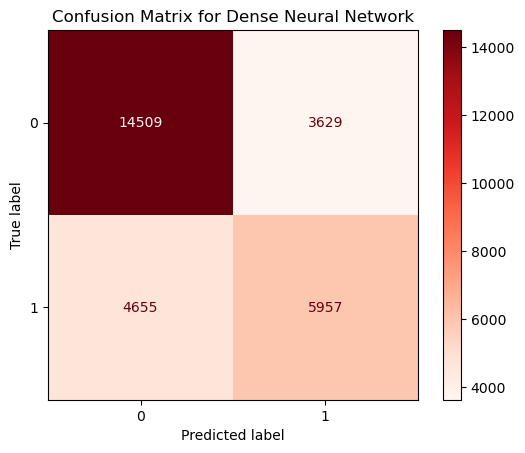

In [19]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap = 'Reds')
plt.title("Confusion Matrix for Dense Neural Network");

As you can see from the accuracy score, this model performed similarly to the Random Forest. The reason I prefer it is it's the only model that was it's performance on sensitivity. My models as a whole were very reluctant to predict the target value. The Dense Neural Network was the only model that correctly predicted the target value more often than not

## Conclusions

This project aimed to predict support for authoritarianism using data from the World Values Survey dataset. The findings reveal that authoritarian thinking is related to attitudes towards religion, divorce, abortion, homosexuality, and misogyny, and is particularly prevalent in Latin America and the Middle East. The machine learning model proved relatively effective at predicting support for authoritarianism, achieving 71% accuracy over a 63% baseline. These results provide valuable insights into the underlying causes of authoritarianism and can inform strategies to prevent its spread in democratic societies.

## Next Steps

- Delve further into the relationship between economic insecurity and support for authoritarianism
- Investigate the role of social media in the spread of authoritarianism
- Compare individual attitudes towards authoritarianism to measures of societal oppression such as the Human Freedom Index